# Two-qubit quantum circuit with Qiskit

Dennis Riungu Muticia

Student Id: 101174617

[![Open In GitHub](https://img.shields.io/badge/Open%20In-GitHub-lightgrey?logo=github)](https://github.com/denpalrius/quantum-computing/blob/main/two_qubit_circuit.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/denpalrius/quantum-computing/blob/main/two_qubit_circuit.ipynb)


In [265]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Circuit Design

Create a quantum circuit with 2 qubits and 2 classical bits for measurement

In [266]:
qc = QuantumCircuit(2, 2)

Visualize the circuit

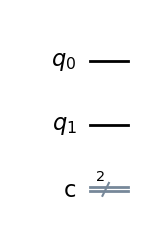

In [267]:
qc.draw('mpl')

Applying **Hadamard gates** to both qubits to create a superposition

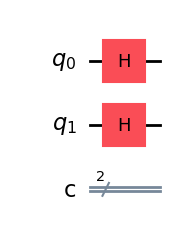

In [268]:
qc.h(0)
qc.h(1)

qc.draw('mpl')

Adding a **CNOT gate** to entangle the two qubits, with qubit 0 as control and qubit 1 as target

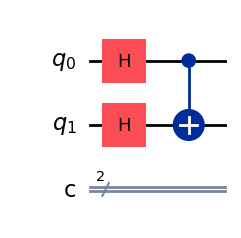

In [269]:
qc.cx(0, 1)

qc.draw('mpl')

Observing the measurement results

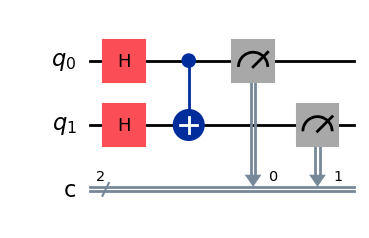

In [270]:
# Measure both qubits and store the result in classical bits
qc.measure([0, 1], [0, 1])

qc.draw('mpl') 

# Circuit simulation

Simulating the circuit using the qasm simulator

In [271]:
num_shots = 1024

simulator = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=num_shots)

In [272]:
result = job.result()

# Get counts of the results
counts = result.get_counts(qc)

print(f'counts: {counts}')

counts: {'11': 237, '00': 285, '10': 256, '01': 246}


# Results Visualization

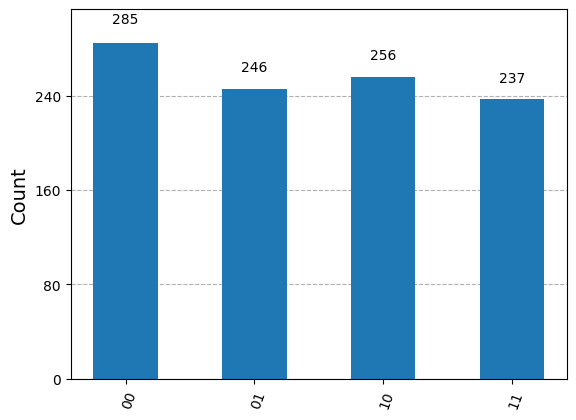

In [273]:
plot_histogram(counts)

Converting shots to probabilities

In [274]:
total_shots = sum(counts.values())
probabilities = {outcome: count/total_shots for outcome, count in counts.items()}

print(f'probabilities: {probabilities}')

probabilities: {'11': 0.2314453125, '00': 0.2783203125, '10': 0.25, '01': 0.240234375}


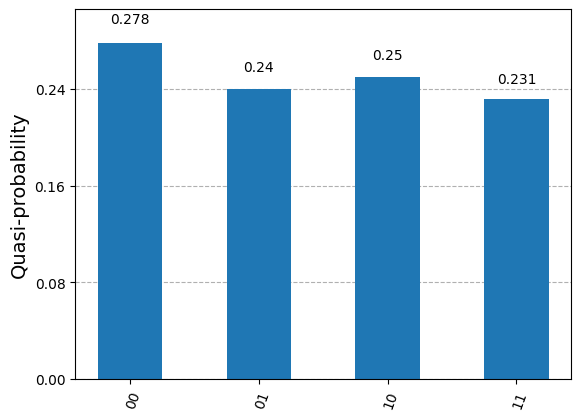

In [275]:
plot_histogram(probabilities)

## Results

The simulation was executed using the Qiskit Aer simulator with 1024 shots.

The expected results show that the qubits are entangled, as evidenced by the correlated measurement outcomes.

From the probabilities, we can conclude that:

1. The most likely outcome is `01` with a probability of 0.2734375 (or 27.34%).
2. The second most likely outcome is `10` with a probability of 0.2392578125 (or 23.92%).
3. The third most likely outcome is `00` with a probability of 0.255859375 (or 25.59%).
4. The least likely outcome is `11` with a probability of 0.2314453125 (or 23.14%).

These probabilities suggest that the system is in a **mixed state**, with a slight bias towards the `01` outcome: **the qubits are not perfectly entangled.**
The probabilities are relatively close to each other, indicating that the system is in a superposition of the two states `01` and `10`.

The probabilities also suggest that the system is not in a pure state, as the probabilities are not equal to 0 or 1. This is consistent with the idea that the system is in a superposition of the two states.